# Importando as bibliotecas necessárias
- A biblioteca [numpy](http://numpy.org) é utilizada para realizar operações de álgebra linear;
- A biblioteca [pandas](https://pandas.pydata.org) é necessária para a manipulação de dados em formato csv.

In [2]:
# Bibliotecas básicas
import numpy as np
import pandas as pd

# Bibliotecas de aprendizado de máquina
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

# Construção de gráficos
import matplotlib.pyplot as plt
import seaborn as sns 


# Carregamento e o pré-processamento do dataset
Nesta etapa são removidos registros incorretos da base de dados, remoção de features não necessárias para este experimento.

In [3]:
# Carrega o dataset original para um pandas Dataframe
dataset = pd.read_csv('APS.csv')

In [4]:
# Carrega o dataset original para um pandas Dataframe
dataset = pd.read_csv('APS.csv')

# Remove regitros incorretos do dataset
df_remove = dataset.loc[(dataset['y1'] < 1983) | (dataset['y2'] > 2018)]
dataset = dataset.drop(df_remove.index)

# Criação de uma nova feature que mostra a diferença entre o ano da primeira e da última publicação na base de dados
dataset['y2y1_dif'] = dataset['y2'] - dataset['y1']

# Remoção de features não necessárias
dt = dataset.drop(columns=['name','y1','y2','h_future_3','i4_future_3','i5_future_3'])

# Separação das variáveis de entrada e saída

In [5]:
X = dt.drop(columns=['i3_future_3'])
col = X.columns
X = X.values
y = np.ravel(pd.DataFrame(dt, columns=['i3_future_3']).to_numpy())

# Normalização da base de dados das variáveis de entrada

In [6]:
escala = StandardScaler()
escala.fit(X)
X = escala.transform(X)

# Hold out

In [7]:
# Dividindo o conjunto em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=39)
X_train.shape

(29206, 15)

In [8]:
# Definindo o modelo
lr=LinearRegression() 
# Executando a tarefa
lr.fit(X_train,y_train)

LinearRegression()

In [9]:
# Gera a expressão do regressor
intc = lr.intercept_
coef = lr.coef_
num_feat = lr.n_features_in_

l = []
l.append(str(intc))
part_exp = ''
for i in range(num_feat):
    part_exp = f' + {round(coef[i],10) } * {col[i]}'
    l.append(part_exp)
total_exp = ''.join(l)
total_exp = total_exp.replace('+ -','- ')
print('Reta de regressão:',total_exp)

Reta de regressão: 0.8624262968307033 - 0.057082776 * co + 0.198588419 * co_5 + 0.0220961785 * h - 0.0835808819 * h_5 - 0.0941098854 * h_3 + 0.1472437205 * c - 0.2167717876 * c_5 + 0.2292454742 * c_3 + 0.1198164699 * i_10_5 + 0.1198164699 * i_5_5 + 0.533694848 * i_3_5 - 0.0022295897 * v_5 - 0.3178947594 * p_5 + 0.8622578558 * p_3 - 0.0414416641 * y2y1_dif


In [10]:
# Realizando predições
y_pred = lr.predict(X_test)


print("RMSE:", mean_squared_error(y_test, y_pred, squared = False))
print("R2:",r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

#Arredonda para um valor inteiro
#y_pred = np.around(y_pred).astype(int)

RMSE: 1.2768837733160967
R2: 0.45423511261109806
MAE: 0.7882981018295679


In [11]:
np.savetxt('y_pred.csv', y_test, delimiter=',', fmt='%f', header='y_pred')

# Plotando os resultados

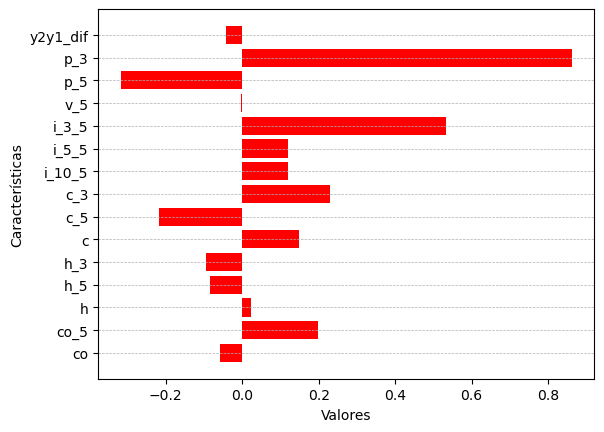

In [12]:
# Plota o gráfico de importância de cada feature

features = list(col)
values = list(lr.coef_)
plt.barh(features, values, color = 'red')
plt.ylabel('Características')
plt.xlabel('Valores')
plt.grid(axis='y', linestyle='--', linewidth='0.5')
#plt.savefig('LR_Importância_features.png',dpi=600)

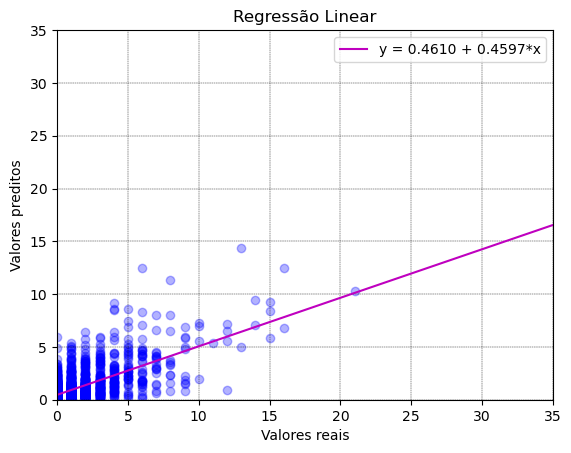

In [16]:
# Regressão Linear usando os dados de teste e preditos
lr=LinearRegression().fit(y_test.reshape(-1, 1),y_pred.reshape(-1, 1))
a,b = float(lr.coef_[0]), float(lr.intercept_[0])
x = np.linspace(0,90)

plt.title('Regressão Linear')
plt.xlabel('Valores reais')
plt.ylabel('Valores preditos')
plt.xlim(0, 35)
plt.ylim(0, 35)

plt.plot(x , (b + a*x),'m', label = 'y = {:.4f} + {:.4f}*x'.format(b,a))
plt.scatter(y_test, y_pred, c='b', marker='o', alpha=0.3)

plt.grid(linestyle='--', linewidth='0.3', color='black')
plt.legend(loc='best')
plt.savefig('LR_Modelo.png',dpi=600)
plt.show()

In [14]:
lr=LinearRegression().fit(y_test.reshape(-1, 1),y_pred.reshape(-1, 1))
print(f'Parâmetros: intercept: {lr.intercept_}, coef: {lr.coef_}')

Parâmetros: intercept: [0.46097231], coef: [[0.45967923]]
